In [213]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [111]:
with open("index_rune", "r") as fp:
    idx = json.load(fp)
with open("impact_categories", "r") as fp:
    impact_category = json.load(fp)


In [112]:
ic_lst = []
for ic in impact_category:
    str_temp = '('
    for icc in ic:
        if icc != ic[-1]:
            str_temp += f'{icc}, '
        else:
            str_temp += f'{icc})'
        # print(icc)
    ic_lst.append(str_temp)
    # print(str_temp)



In [113]:
file_name_sub = r'Results\Ananas sub - CONSQ.xlsx'
df = pd.read_excel(file_name_sub)
# Convert JSON strings back to lists for all columns
df = df.applymap(lambda x: json.loads(x) if isinstance(x, str) and x.startswith('[') else x)
df = df.set_axis(idx)
df.columns = ic_lst
df

C:\Users\ruw\AppData\Local\Temp\2\ipykernel_4220\3576165090.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: json.loads(x) if isinstance(x, str) and x.startswith('[') else x)


,"(EF v3.1 EN15804, acidification, accumulated exceedance (AE))","(EF v3.1 EN15804, climate change, global warming potential (GWP100))","(EF v3.1 EN15804, ecotoxicity: freshwater, comparative toxic unit for ecosystems (CTUe))","(EF v3.1 EN15804, energy resources: non-renewable, abiotic depletion potential (ADP): fossil fuels)","(EF v3.1 EN15804, eutrophication: freshwater, fraction of nutrients reaching freshwater end compartment (P))","(EF v3.1 EN15804, eutrophication: marine, fraction of nutrients reaching marine end compartment (N))","(EF v3.1 EN15804, eutrophication: terrestrial, accumulated exceedance (AE))","(EF v3.1 EN15804, human toxicity: carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, human toxicity: non-carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, ionising radiation: human health, human exposure efficiency relative to u235)","(EF v3.1 EN15804, land use, soil quality index)","(EF v3.1 EN15804, material resources: metals/minerals, abiotic depletion potential (ADP): elements (ultimate reserves))","(EF v3.1 EN15804, ozone depletion, ozone depletion potential (ODP))","(EF v3.1 EN15804, particulate matter formation, impact on human health)","(EF v3.1 EN15804, photochemical oxidant formation: human health, tropospheric ozone concentration increase)","(EF v3.1 EN15804, water use, user deprivation potential (deprivation-weighted water consumption))"
Steel cylinder - sc 1,"[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),..."
nitrous oxide production - sc 1,"[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N..."
Use phase basecase - sc 1,"[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 227....","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 1.33...","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]"
EoL 50L cylinder - FU

In [227]:
df1 = df.copy()
for index, row in df1.iterrows():
    for col in df1.columns:
        temp = 0
        temp_use_el = None
        temp_use = None
        temp_N2O = None
        new_row_col = []
        for proc in row[col]:
            if 'transport' in proc[0]:
                temp += proc[1]
            elif 'use' in index.lower():
                if 'use' in proc[0].lower():
                    temp_use = proc[1]
                if 'electricity' in proc[0]:
                    temp_use_el = proc[1]
                    new_row_col.append(proc)
                if temp_use is not None and temp_use_el is not None:
                    temp_N2O = temp_use - temp_use_el
            else:
                new_row_col.append(proc)
        if temp != 0:
            new_row_col.append(['transport', temp])
            # print(f'{index} : use for {col} = {temp_N2O}')
            row[col] = new_row_col
            
        if temp_N2O != None:
                if temp_N2O < 0:
                    new_row_col.append(['nitrous oxided emissions', 0])
                    # print(f'{index} : use for {col} = {temp_N2O}')
                    row[col] = new_row_col
                else:
                    new_row_col.append(['nitrous oxided emissions', 0])
                    # print(f'{index} : use for {col} = {temp_N2O}')
                    row[col] = new_row_col
                
        elif 'basecase' in proc[0]:
            new_row_col.append(['nitrous oxided emissions', 0])
            row[col] = new_row_col


In [228]:
df1

,"(EF v3.1 EN15804, acidification, accumulated exceedance (AE))","(EF v3.1 EN15804, climate change, global warming potential (GWP100))","(EF v3.1 EN15804, ecotoxicity: freshwater, comparative toxic unit for ecosystems (CTUe))","(EF v3.1 EN15804, energy resources: non-renewable, abiotic depletion potential (ADP): fossil fuels)","(EF v3.1 EN15804, eutrophication: freshwater, fraction of nutrients reaching freshwater end compartment (P))","(EF v3.1 EN15804, eutrophication: marine, fraction of nutrients reaching marine end compartment (N))","(EF v3.1 EN15804, eutrophication: terrestrial, accumulated exceedance (AE))","(EF v3.1 EN15804, human toxicity: carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, human toxicity: non-carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, ionising radiation: human health, human exposure efficiency relative to u235)","(EF v3.1 EN15804, land use, soil quality index)","(EF v3.1 EN15804, material resources: metals/minerals, abiotic depletion potential (ADP): elements (ultimate reserves))","(EF v3.1 EN15804, ozone depletion, ozone depletion potential (ODP))","(EF v3.1 EN15804, particulate matter formation, impact on human health)","(EF v3.1 EN15804, photochemical oxidant formation: human health, tropospheric ozone concentration increase)","(EF v3.1 EN15804, water use, user deprivation potential (deprivation-weighted water consumption))"
Steel cylinder - sc 1,"[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),..."
nitrous oxide production - sc 1,"[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N..."
Use phase basecase - sc 1,"[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]"
EoL 50L cylinder - FU - sc 1,"[['Cylinder cleaning 50L' (unit, GLO, None), 0...","[['Cylinder cleaning 50L' (unit, GLO, None), 0...","[['Cylinder cleaning 50L' (unit, GLO, None), 0...","[['Cylinder cleaning 50L' (unit, GLO, None), 0...","[['Cylinder cleaning 50L' (unit, GLO, None)

In [229]:
df_GWP = df1['(EF v3.1 EN15804, climate change, global warming potential (GWP100))']
df_GWP = df_GWP.to_frame()
df_GWP

,"(EF v3.1 EN15804, climate change, global warming potential (GWP100))"
Steel cylinder - sc 1,"[['Compresser opration 50L' (unit, GLO, None),..."
nitrous oxide production - sc 1,"[['nitrous oxide production' (kilogram, RER, N..."
Use phase basecase - sc 1,"[[nitrous oxided emissions, 0]]"
EoL 50L cylinder - FU - sc 1,"[['Cylinder cleaning 50L' (unit, GLO, None), 0..."
CDU updated - sc 2,"[['Electronics' (kilogram, GLO, None), 0.03740..."
Steel cylinder - sc 2,"[['Compresser opration 50L' (unit, GLO, None),..."
nitrous oxide production - sc 2,"[['nitrous oxide production' (kilogram, RER, N..."
Use phase CDU - sc 2,"[['market for electricity, low voltage' (kilow..."
EoL CDU - sc 2,"[['treatment of scrap printed wiring boards, s..."
EoL 50L cylinder - FU - sc 2,"[['Cylinder cleaning 50L' (unit, GLO, None), 0..."


In [230]:
for sc in range(1,4):
    print(f'sc. {sc}')
    for index, row in df_GWP.iterrows():
        for col in df_GWP.columns:
            for proc in row[col]:
                if f'{sc}' in index:
                    # print(index)
                    if 'use' in index.lower():
                        print(f'Use phase : {index}, row {proc}')
                    elif 'eol' in index.lower():
                        print(f'EoL : {index}, row {proc}')
                    else:
                        print(f'RM + prod. : {index}, row {proc}')

sc. 1
RM + prod. : Steel cylinder - sc 1, row ["'Compresser opration 50L' (unit, GLO, None)", 1.6506026376331343e-05]
RM + prod. : Steel cylinder - sc 1, row ["'Steel cylinder prod.' (unit, GLO, None)", 0.004965675918395517]
RM + prod. : Steel cylinder - sc 1, row ["'Hydrastic testing 50L' (unit, GLO, None)", 0.0002986988027667966]
RM + prod. : Steel cylinder - sc 1, row ["'nitrous oxide production' (kilogram, RER, None)", 0.0]
RM + prod. : Steel cylinder - sc 1, row ['transport', 0.00017534877155276442]
RM + prod. : nitrous oxide production - sc 1, row ["'nitrous oxide production' (kilogram, RER, None)", 2.405968748621886]
Use phase : Use phase basecase - sc 1, row ['nitrous oxided emissions', 0]
EoL : EoL 50L cylinder - FU - sc 1, row ["'Cylinder cleaning 50L' (unit, GLO, None)", 0.02667376660028759]
EoL : EoL 50L cylinder - FU - sc 1, row ["'nitrous oxide production' (kilogram, RER, None)", 0.27757829408186957]
EoL : EoL 50L cylinder - FU - sc 1, row ["'Cylinder maintenance 50L' (un

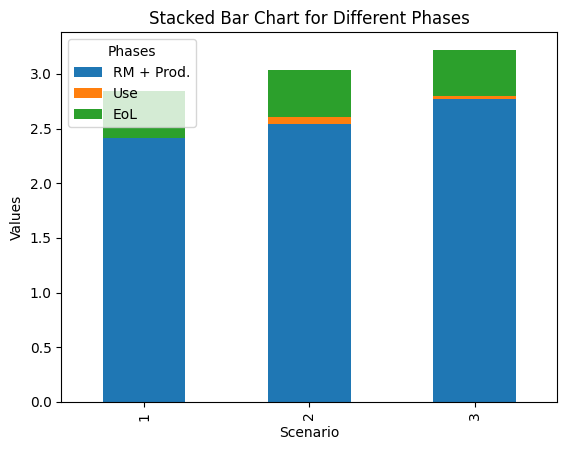

In [236]:
# Initialize dictionaries to store the values
rm_prod = {1: 0, 2: 0, 3: 0}
use_phase = {1: 0, 2: 0, 3: 0}
eol_phase = {1: 0, 2: 0, 3: 0}

# Iterate through the DataFrame and categorize the values
for sc in range(1, 4):
    for index, row in df_GWP.iterrows():
        for col in df_GWP.columns:
            for proc in row[col]:
                if f'{sc}' in index:
                    if 'use' in index.lower():
                        use_phase[sc] += proc[1]
                    elif 'eol' in index.lower():
                        eol_phase[sc] += proc[1]
                    else:
                        rm_prod[sc] += proc[1]

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'RM + Prod.': rm_prod,
    'Use': use_phase,
    'EoL': eol_phase
})

# Plot the stacked bar chart
plot_data.plot(kind='bar', stacked=True)
plt.xlabel('Scenario')
plt.ylabel('Values')
plt.title('Stacked Bar Chart for Different Phases')
plt.legend(title='Phases')
plt.show()